<a href="https://colab.research.google.com/github/Hyenni/analysis_Astronomy_Data/blob/master/sun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thinking in a Different Way

#### data preparing

In [0]:
# FITS file1 upload
from google.colab import files
files.upload()

In [0]:
# fitsfile.py upload
from google.colab import files
files.upload()

In [0]:
#sdoaia171 pickle upload
from google.colab import files
files.upload()

### SAMPLE 01. Display SDO.

* Using matplotlib

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import fitsfile3

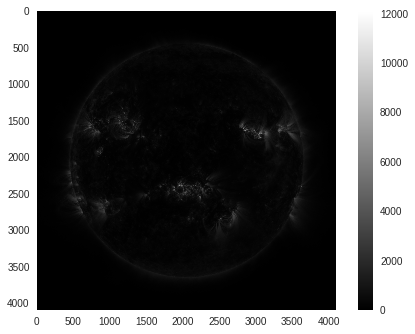

In [194]:
fits = fitsfile3.FitsFile()
fits.load_file("aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits")

  # Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

### SAMPLE 02. Display SDO in log scale.

* y = log10(x)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


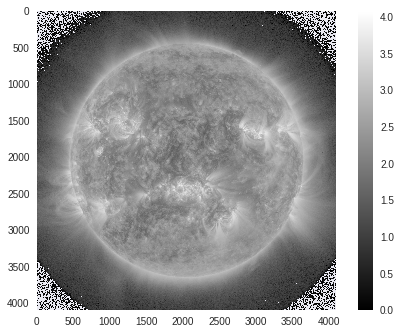

In [102]:
# Convert data to logscale.
log_data1 = np.log10(fits.data)

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(log_data1, cmap=cm.gray)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

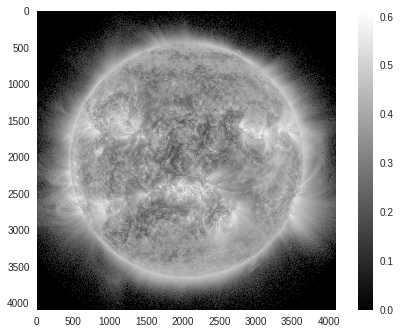

In [90]:
# Convert data to logscale.
log_data2 = np.clip(fits.data, 1.0, None)
log_data2 = np.log10(log_data2)

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(log_data2, cmap=cm.gray)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

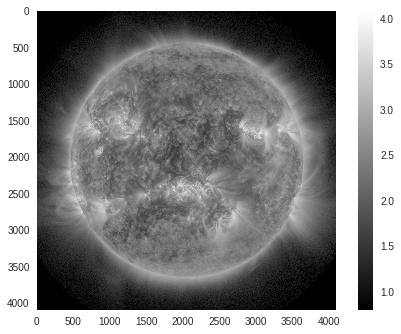

In [93]:
# Convert data to logscale.
log_data3 = np.clip(fits.data, 1.0, None)
log_data3 = np.log10(log_data3)

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(log_data3, cmap=cm.gray, vmin=0.8)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

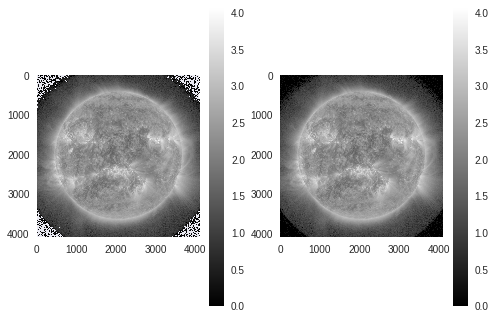

In [103]:
#logscale 1 step version and final step version.
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(log_data1, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(log_data3, cmap=cm.gray)
plt.colorbar(im2, ax=ax2)
plt.grid(None)
plt.show()

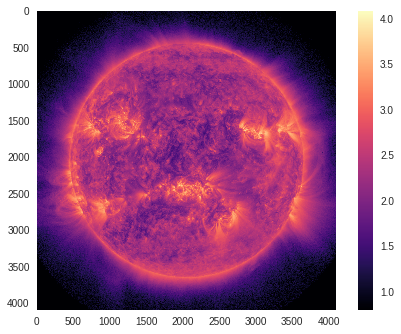

In [97]:
#colormap = magma
fig, ax = plt.subplots()
im = plt.imshow(log_data3, cmap=cm.magma, vmin=0.8)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

####pickle

* pickle is a very useful library for storing and loading data.

In [0]:
import numpy as np
import pickle

file = open("sdoaia171.pickle", "rb")
sdoaia171 = pickle.load(file)
file.close()

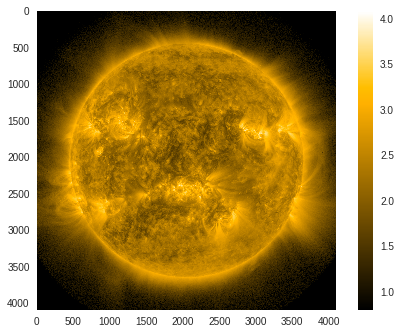

In [0]:
# Convert data to logscale.
log_data = np.clip(fits.data, 1.0, None)
log_data = np.log10(log_data)

min = np.min(log_data)
max = np.max(log_data)

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(log_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

### SAMPLE 03. Display histogram.

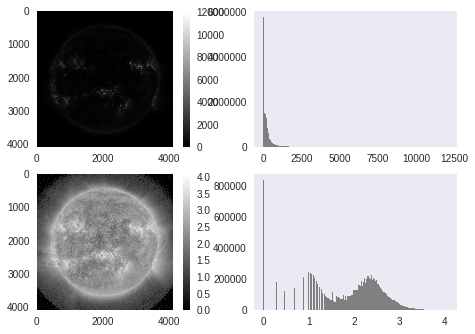

In [0]:
# Convert data to logscale and compute histograms.

raw_img = fits.data
raw_min = np.min(raw_img)
raw_max = np.max(raw_img)
raw_span = raw_max - raw_min
raw_y, raw_x = np.histogram(raw_img, bins=np.arange(raw_min, raw_max, raw_span/256))

scale_img = np.clip(raw_img, 1.0, None)
scale_img = np.log10(scale_img)
scale_min = np.min(scale_img)
scale_max = np.max(scale_img)
scale_span = scale_max - scale_min
scale_y, scale_x = np.histogram(scale_img, bins=np.arange(scale_min, scale_max, scale_span/256))


fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
im1 = ax1.imshow(raw_img, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax2 = fig.add_subplot(2,2,2)
img2 = ax2.bar(raw_x[:-1], raw_y, width=raw_span/256, color="gray")
plt.grid(None)

ax3 = fig.add_subplot(2,2,3)
im3 = ax3.imshow(scale_img, cmap=cm.gray)
plt.colorbar(im3, ax=ax3)
plt.grid(None)

ax4 = fig.add_subplot(2,2,4)
img4 = ax4.bar(scale_x[:-1], scale_y, width=scale_span/256, color="gray")
plt.grid(None)
plt.show()


### SAMPLE 04. Difference

* Computing difference image

* Applying sigmoid function

In [0]:
# FITS file2 upload
from google.colab import files
files.upload()

#### View fits1

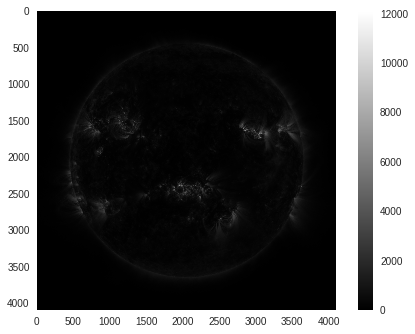

In [0]:
fits1 = fitsfile3.FitsFile()
fits1.load_file("aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits")

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits1.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

#### View fits2

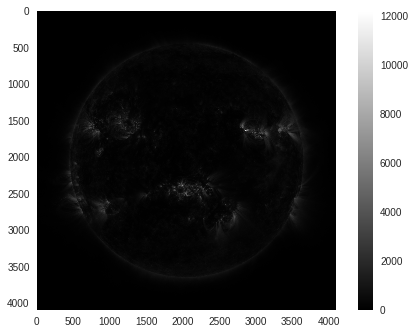

In [0]:
fits2 = fitsfile3.FitsFile()
fits2.load_file("aia.lev1_171_2013-05-01T03_30_00Z_image_lev1.fits")

# Display the FITS.
fig, ax = plt.subplots()
im = plt.imshow(fits2.data, cmap=cm.gray)
plt.colorbar(im, ax=ax)

plt.grid(None)
plt.show()

In [0]:
img1 = np.clip(fits1.data, 1.0, None)
img1 = np.log10(img1)

img2 = np.clip(fits2.data, 1.0, None)
img2 = np.log10(img2)

#### Calculate difference & View

In [0]:
diff = img2 - img1

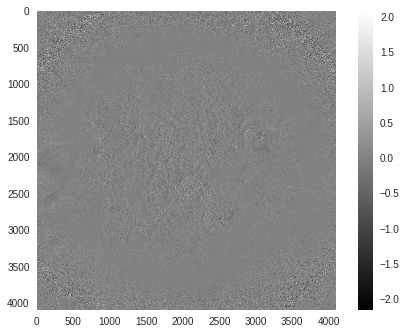

In [0]:
fig, ax = plt.subplots()
im = plt.imshow(diff, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

#### clip (min, max)

* numpy.clip(a, a_min, a_max, out=None)

  -> Limit the value of an array


In [0]:
min = np.min(diff)
print (min)

max = np.max(diff)
print (max)

-2.1522883443830563
2.08278537031645


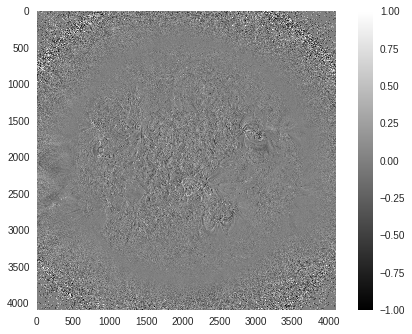

In [0]:
diff = np.clip(diff, -1.0, +1.0)

fig, ax = plt.subplots()
im = plt.imshow(diff, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

#### sigmoid

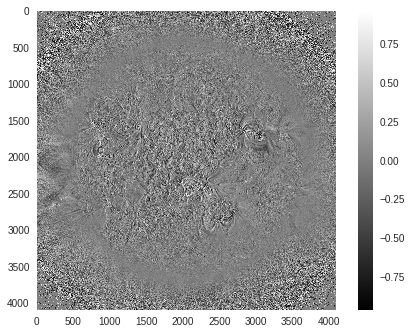

In [0]:
sig = np.tanh(diff*2.0)

fig, ax = plt.subplots()
im = plt.imshow(sig, cmap=cm.gray)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()


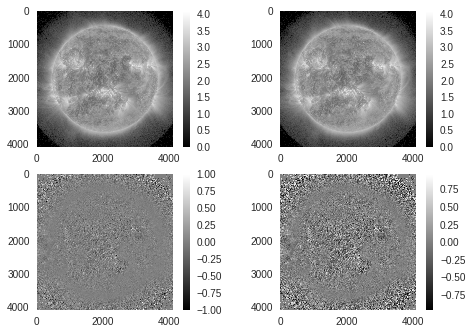

In [0]:
# Display the FITS.
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
im1 = ax1.imshow(img2, cmap=cm.gray)
plt.colorbar(im1, ax=ax1)
plt.grid(None)

ax2 = fig.add_subplot(2,2,2)
im2 = ax2.imshow(img1, cmap=cm.gray)
plt.colorbar(im2, ax=ax2)
plt.grid(None)

ax3 = fig.add_subplot(2,2,3)
im3 = ax3.imshow(diff, cmap=cm.gray)
plt.colorbar(im3, ax=ax3)
plt.grid(None)

ax4 = fig.add_subplot(2,2,4)
im4 = ax4.imshow(sig, cmap=cm.gray)
plt.colorbar(im4, ax=ax4)
plt.grid(None)
plt.show()

In [0]:
#sample[axis y,axis x]
roi_diff = diff[2500:3000, 2000:3000]
roi_sig = sig[2500:3000, 2000:3000]

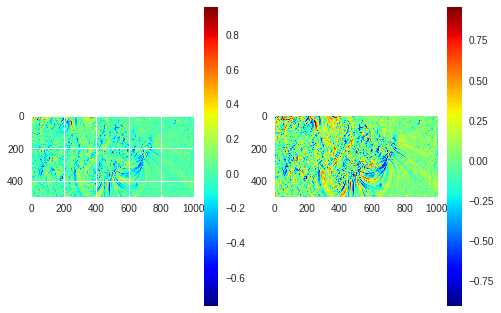

In [0]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
im1 = ax1.imshow(roi_diff, cmap=cm.jet)
plt.colorbar(im1, ax=ax1)

ax2 = fig.add_subplot(1,2,2)
im2 = ax2.imshow(roi_sig, cmap=cm.jet)
plt.colorbar(im2, ax=ax2)
plt.grid(None)
plt.show()

### SAMPLE  05. Convert coordinates.

* 1 revolution : 2 x π

* resolution of degree : 2 x π x 1000

* x = cos(theta)

* y = sin(theta)

=> data reseting 

why? it is intuitive to see

#### Standard: height/2

In [0]:
fits = fitsfile3.FitsFile()
fits.load_file("aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits")

# Convert data to logscale.
fits.data = np.clip(fits.data, 1.0, None)
fits.data = np.log10(fits.data)

In [0]:
import math

# Create a new data.
(h, w) = fits.data.shape
w = int(2 * 3.14 * 1000) # 360 degree in radian
h = int(h / 2)

new_data = np.empty((h, w), fits.data.dtype)


# Convert coordinates.
for y in range(h):		# distance from the center
	for x in range(w):	# degree
		ox = int(h + math.sin(x/1000.0) * y)
		oy = int(h - math.cos(x/1000.0) * y)

		new_data[h-y-1, x] = fits.data[oy, ox]

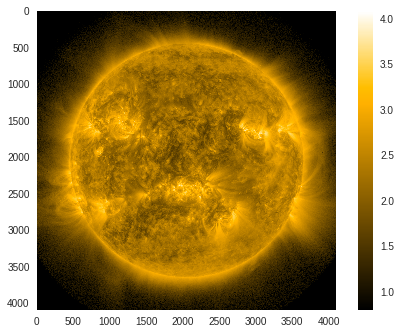

In [157]:
# Display the FITS and the old data.

fig, ax = plt.subplots()

im = plt.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

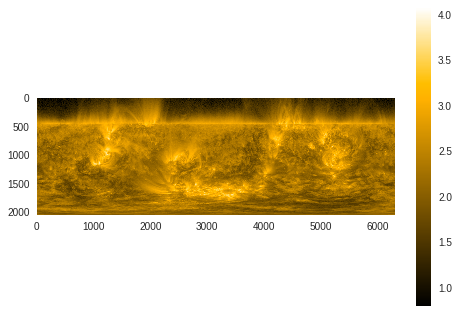

In [197]:
# Display the FITS and the new data.

fig, ax = plt.subplots()

im = plt.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

#### Standard: diagonal length  

#complete

In [0]:
fits = fitsfile3.FitsFile()
fits.load_file("aia.lev1_171_2013-05-01T03_00_00Z_image_lev1.fits")

import math

# Convert data to logscale.
fits.data = np.clip(fits.data, 1.0, None)
fits.data = np.log10(fits.data)

In [186]:
(h, w) = fits.data.shape
rad = int(2 * 3.14 * 1000) # 360 degree in radian
cen = int(h/2)
dia = int(h/2*1.414)

new_data2 = []
new_data2 = np.empty((dia, rad), fits.data.dtype)

print (h)
print (dia)

4096
2895


In [0]:
# Convert coordinates.
for y in range(0,dia):		# distance from the center
  for x in range(0,rad):	# degree
    
    ox = int(cen + math.sin(x/1000.0) * y)
    oy = int(cen - math.cos(x/1000.0) * y)

    
    if (ox >= 0 and ox < 4095):
      if (oy >= 0 and oy < 4095):
        new_data2[dia-y-1, x] = fits.data[oy, ox]

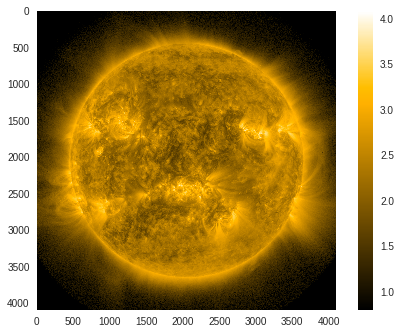

In [146]:
# Display the FITS and the old data.
fig, ax = plt.subplots()

im = plt.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im, ax=ax)
plt.grid(None)
plt.show()

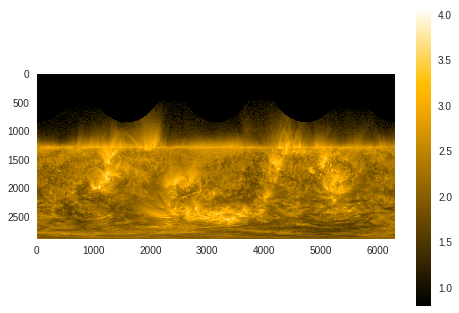

In [155]:
# Display the FITS and the new data.
fig, ax = plt.subplots()

im = plt.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im,ax=ax)
plt.grid(None)

plt.show()

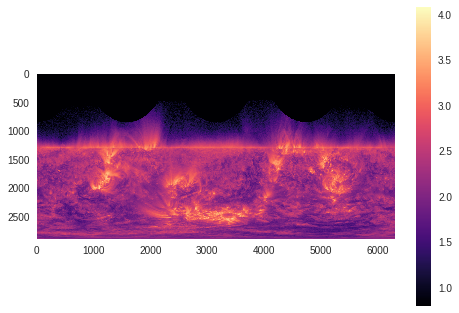

In [189]:
# Display the FITS and the new data.
fig, ax = plt.subplots()

im = plt.imshow(new_data2, cmap=cm.magma, vmin=0.8)
plt.colorbar(im,ax=ax)
plt.grid(None)

plt.show()

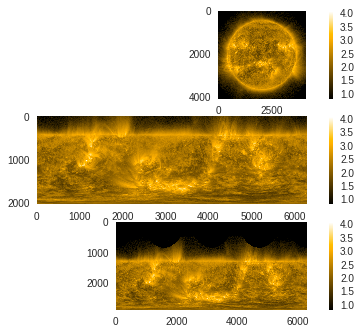

In [199]:
#all figure

fig = plt.figure()

ax1 = fig.add_subplot(3,1,1)
im1 = ax1.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im1, ax=ax1)
title('Original fits.data')  
plt.grid(None)

ax2 = fig.add_subplot(3,1,2)
im2 = ax2.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im2, ax=ax2)
title('Convert coordinate: radius')  
plt.grid(None)

ax3 = fig.add_subplot(3,1,3)
im3 = ax3.imshow(new_data2, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im3, ax=ax3)
title('Convert coordinate: diagonal')
plt.grid(None)

plt.show()

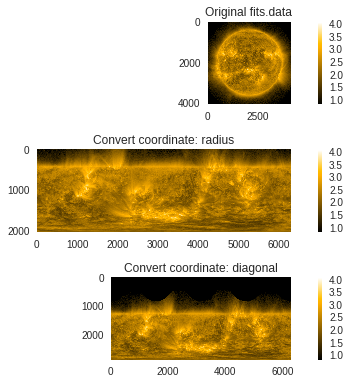

In [205]:
#all figure

fig = plt.figure()

ax1 = fig.add_subplot(3,1,1)
im1 = ax1.imshow(fits.data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im1, ax=ax1)
plt.title('Original fits.data')  
plt.grid(None)

ax2 = fig.add_subplot(3,1,2)
im2 = ax2.imshow(new_data, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im2, ax=ax2)
plt.title('Convert coordinate: radius')  
plt.grid(None)

ax3 = fig.add_subplot(3,1,3)
im3 = ax3.imshow(new_data2, cmap=sdoaia171, vmin=0.8)
plt.colorbar(im3, ax=ax3)
plt.title('Convert coordinate: diagonal')
plt.grid(None)
plt.tight_layout()
plt.show()